<a href="https://colab.research.google.com/github/apadkavyrava/Card-default-predition/blob/master/Credit_default_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statistics as st


In [22]:
# Load data

data = pd.read_csv('Original_data/Credit_Card.csv')
data.head(2)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## Data cleaning


In [24]:
# EDUCATION

# The 7 category represents Level 7 of the UK education system. 

data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [25]:
# MARRIAGE

# 4 categories represent full marriage status - Single, Married, Divorced,Widowed 

data['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [26]:
# SEX

# Binary system - male/female

data['SEX'].unique()

array([2, 1])

In [27]:
# AGE

# The rage is valid from 21 to 79 and all values is integer

data['AGE'].describe()


count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [28]:
# PAY_0 (correcpond to month lag)

#  Value Meaning 
# -2 - No consumption (customer didn’t use the card)
# 1Paid on time (no delay)
# 0 Used credit but not delayed
#1–9 Payment delay of 1 to 9+ months

data['PAY_0'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

## Analytics


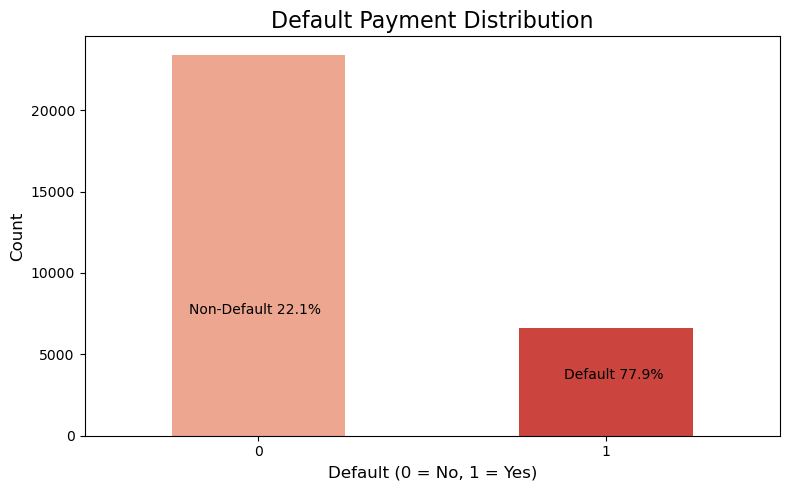

In [38]:
# Pos vs. Neg cases

# Calculate counts
pos = data["default.payment.next.month"].sum()     # defaults = 1
neg = len(data) - pos                              # non-defaults = 0

# Percentages
pos_per = round(pos / len(data) * 100, 1)
neg_per = round(neg / len(data) * 100, 1)


plt.figure(figsize=(8, 5))
sns.countplot(
    x="default.payment.next.month",
    hue="default.payment.next.month",
    data=data,
    palette="Reds",
    width=0.5,
    legend=False
)

# Add percentage labels 
plt.annotate("Non-Default " + str(pos_per) + "%", xy = (-0.2, 7500)) 
plt.annotate("Default " + str(neg_per)+"%", xy = (0.88, 3500)) 

plt.title("Default Payment Distribution", fontsize=16)
plt.xlabel("Default (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()


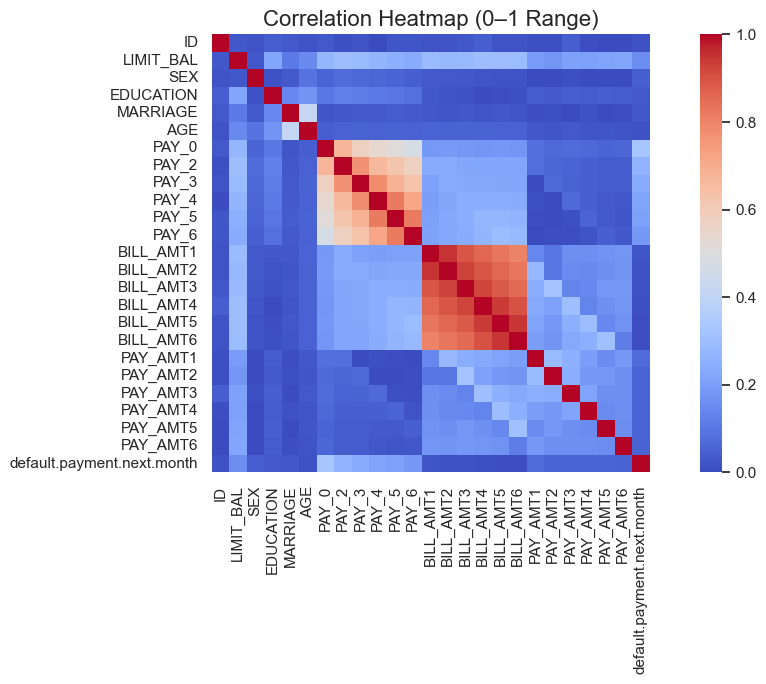

In [54]:
# Heatmap - check if values are predictive

plt.figure(figsize=(11, 7))  
corr = data.corr().abs()      # convert correlations to 0–1 range (absolute values)

sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,
    vmin=0, vmax=1,           
    square=True
)

plt.title("Correlation Heatmap (0–1 Range)", fontsize=16)
plt.tight_layout()
plt.show()


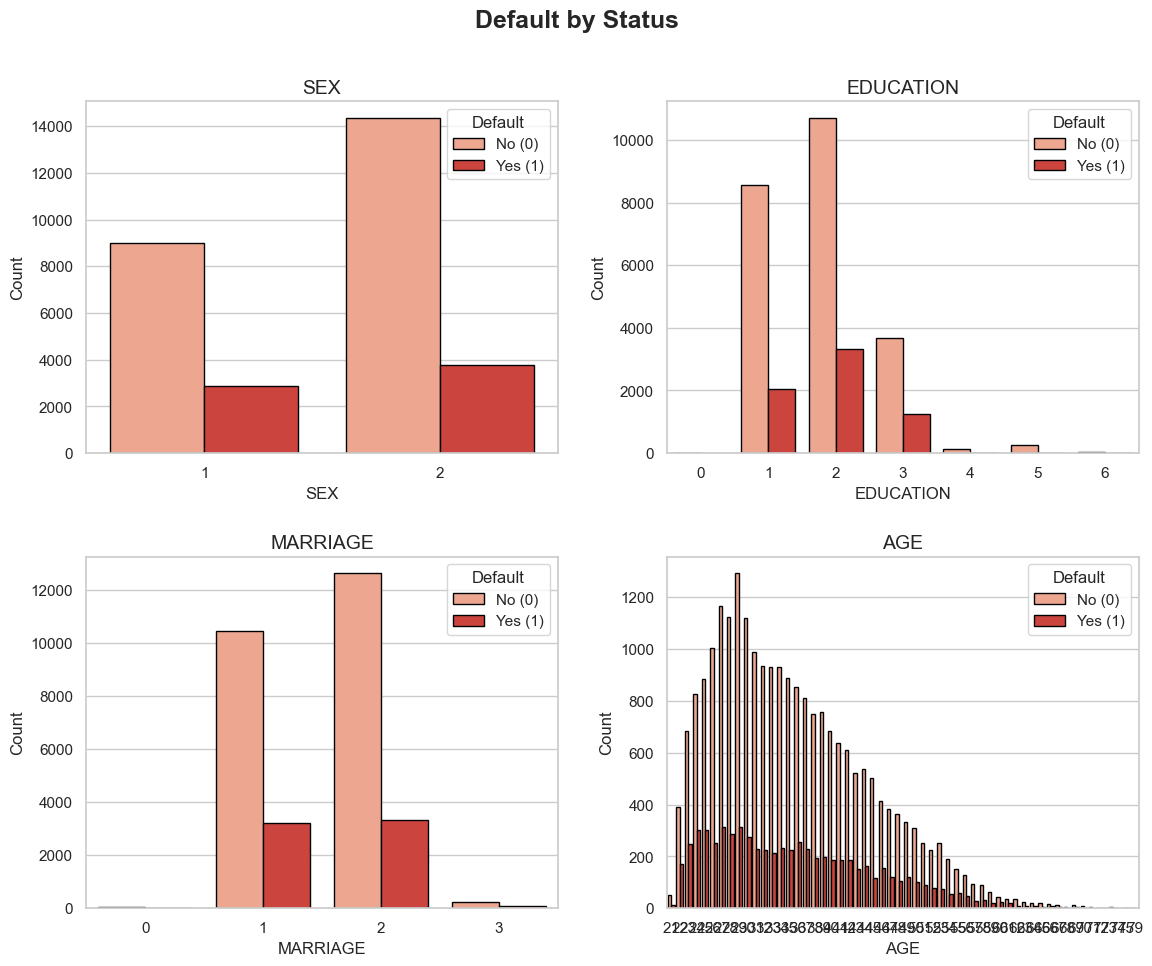

In [55]:
# Default by status

sns.set_theme(style="whitegrid")

cols = ["SEX", "EDUCATION", "MARRIAGE", "AGE"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10), facecolor="white")
fig.suptitle("Default by Status", fontsize=18, fontweight="bold", y=0.98)

plot_params = dict(
    hue="default.payment.next.month",
    data=data,
    palette="Reds",
    edgecolor="black"
)

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, ax=axes[i], **plot_params)
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Default", labels=["No (0)", "Yes (1)"])

plt.tight_layout(pad=2.0)
plt.show()


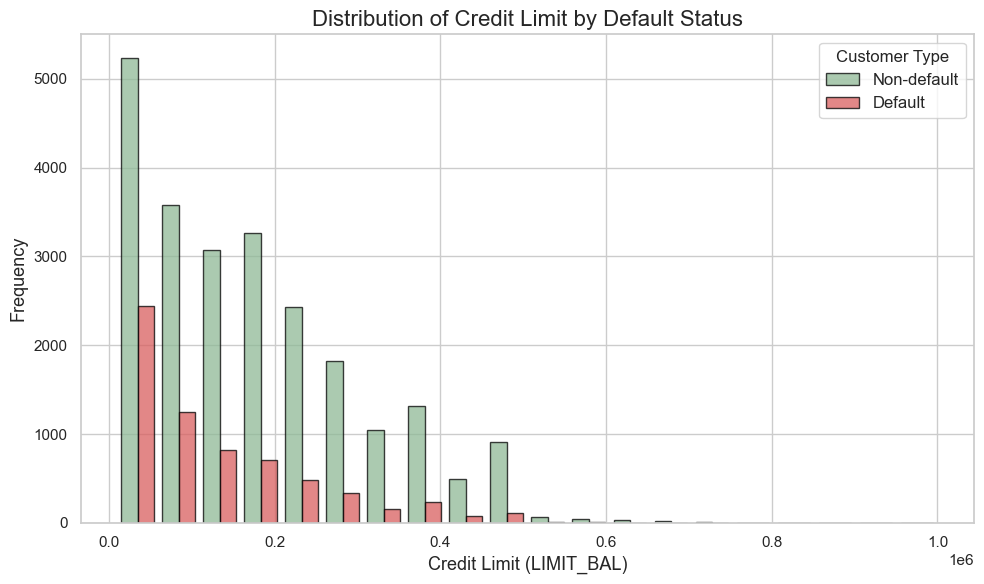

In [41]:
# Defaults vs. non-defaults base on card limit

sns.set_theme(style="whitegrid")

# Split data
card_pos = data[data["default.payment.next.month"] == 0]["LIMIT_BAL"]
card_neg = data[data["default.payment.next.month"] == 1]["LIMIT_BAL"]

plt.figure(figsize=(10, 6))

plt.hist(
    [card_pos, card_neg],
    bins=20,
    color=["#8FB996", "#D95F5F"],   
    alpha=0.75,
    label=["Non-default", "Default"],
    edgecolor="black"
)

plt.title("Distribution of Credit Limit by Default Status", fontsize=16)
plt.xlabel("Credit Limit (LIMIT_BAL)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.legend(title="Customer Type", fontsize=12)

plt.tight_layout()
plt.show()


In [0]:
# Stats

print('total clients {}'.format(data['ID'].count()))
print('Average credit card limit {}'.format(round(st.mean(data['LIMIT_BAL']),1)))
print('Standard deviation of limits {}'.format(st.pstdev(round(data['LIMIT_BAL']),1)))
print('Most common status{}'.format(st.median(data['MARRIAGE'])))
print('Most common leven of education {}'.format(st.median(data['EDUCATION'])))
print('Most common gender  {}'.format(st.median(data['SEX']),1))
print('Estimate age {}'.format (st.median(data['AGE']),1))

total clients 30000
Average credit card limit 167484.3
Standard deviation of limits 129745.49908815547
Most common status2.0
Most common leven of education 2.0
Most common gender  2.0
Estimate age 34.0


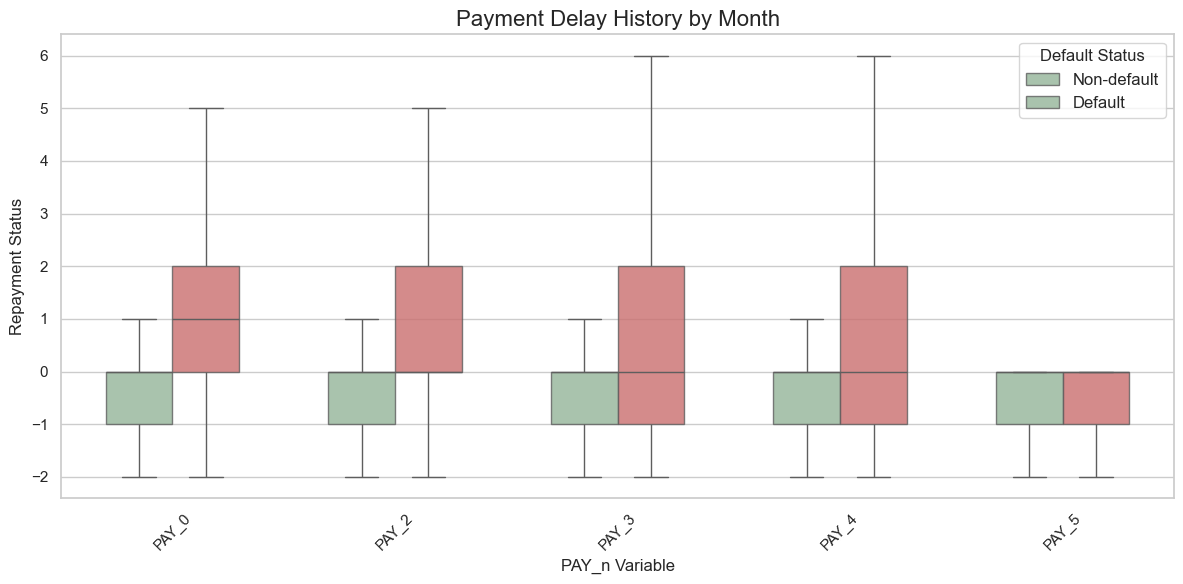

In [46]:
# Default history by months

sns.set_theme(style="whitegrid")

default = "default.payment.next.month"

# Prepare data
month_p = data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']]
month_p = pd.concat([data[default], month_p], axis=1)
month_p = pd.melt(month_p, id_vars=default, var_name="Month", value_name="Status")

# Plot
plt.figure(figsize=(12, 6))

sns.boxplot(
    x="Month",
    y="Status",
    hue=default,
    data=month_p,
    palette=["#8FB996", "#D95F5F"],  
    width=0.6,
    showfliers=False,              
    boxprops=dict(alpha=0.8)
)

plt.title("Payment Delay History by Month", fontsize=16)
plt.xlabel("PAY_n Variable", fontsize=12)
plt.ylabel("Repayment Status", fontsize=12)

plt.legend(
    title="Default Status",
    labels=["Non-default", "Default"],
    loc="upper right",
    fontsize=12
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


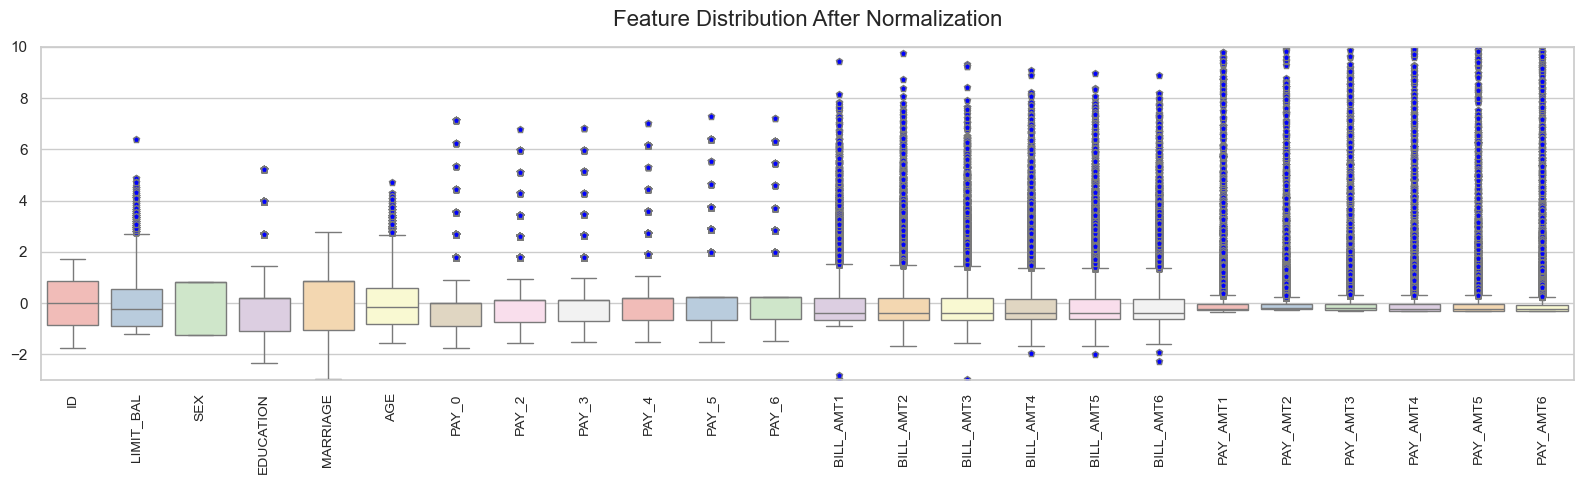

In [48]:
# Have a look to features distribushion

# Standardization
stdX = (features - features.mean()) / features.std()

plt.figure(figsize=(16, 5))
plt.title("Feature Distribution After Normalization", fontsize=16, pad=15)

sns.boxplot(
    data=stdX,
    palette="Pastel1",
    fliersize=4,
    flierprops=dict(markerfacecolor='blue', marker='p', markersize=5)
)

plt.xticks(rotation=90, fontsize=10)
plt.ylim([-3, 10])
plt.tight_layout()
plt.show()


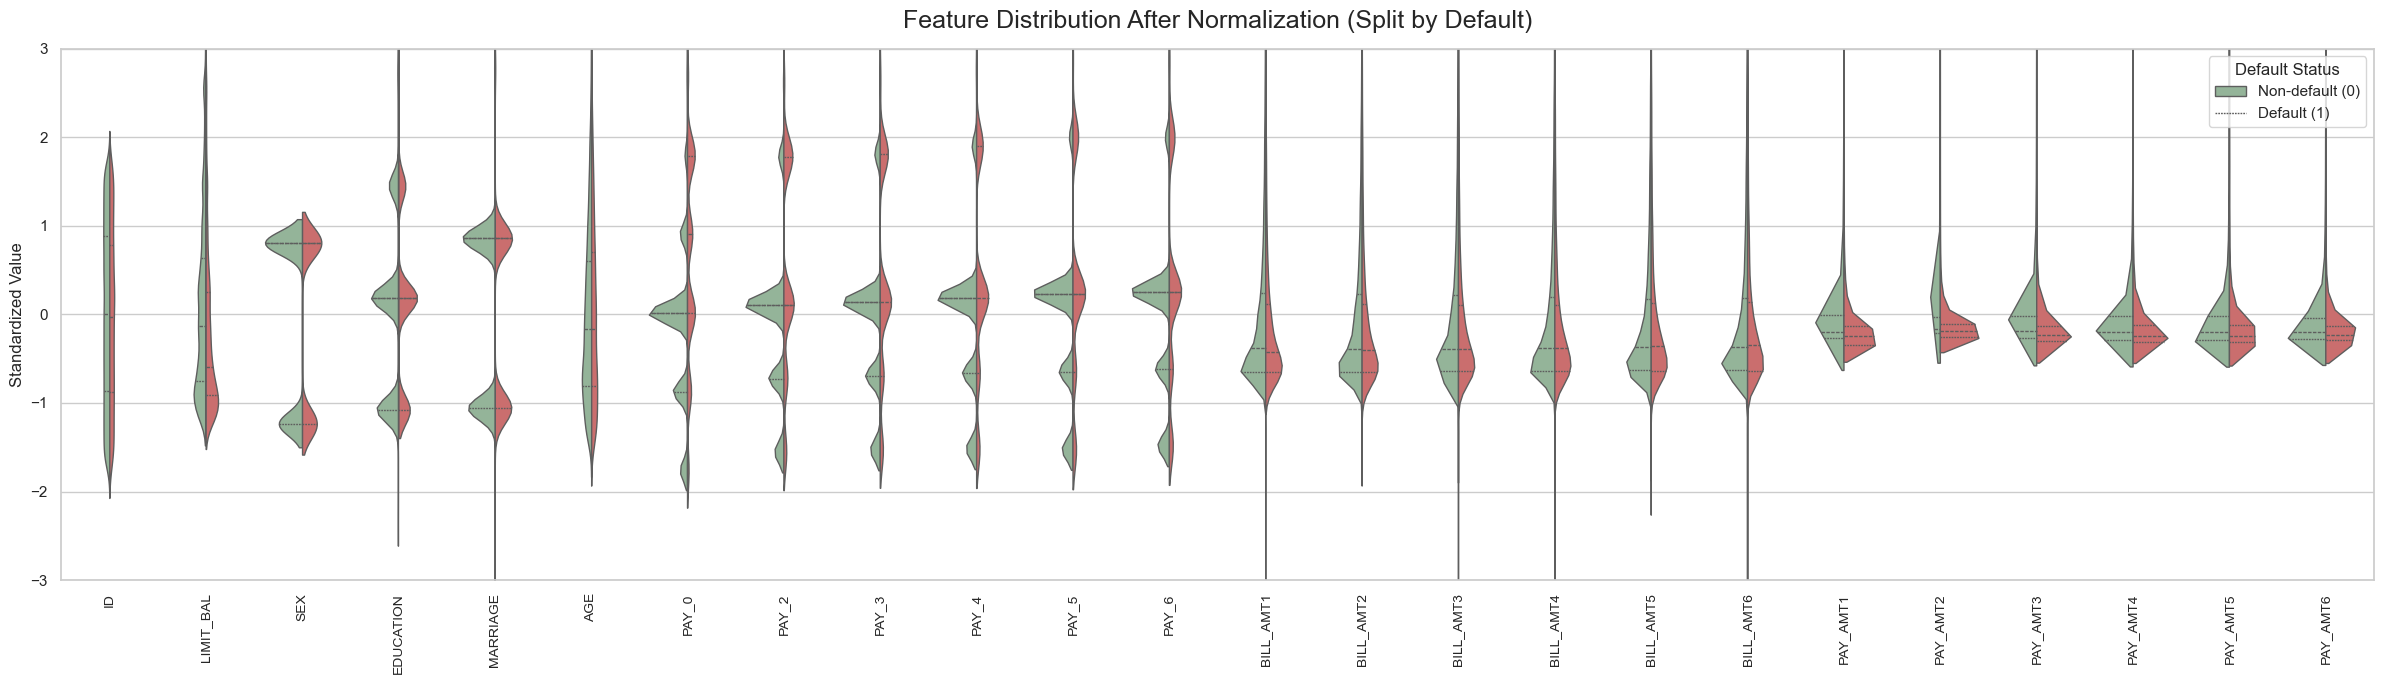

In [50]:
# Feature Distribution After Normalization (Split by Default)

# Combine default and standardized features
stdX2 = pd.concat([data[default], stdX], axis=1)

# Melt into long format
stdX_long = pd.melt(
    stdX2,
    id_vars=default,
    var_name="Feature",
    value_name="Value"
)

plt.figure(figsize=(24, 7))
sns.violinplot(
    x="Feature",
    y="Value",
    hue=default,
    data=stdX_long,
    palette=palette,
    split=True,
    inner="quart",
    linewidth=1
)

plt.ylim([-3, 3])
plt.title("Feature Distribution After Normalization (Split by Default)", fontsize=18, pad=15)
plt.xlabel("")
plt.ylabel("Standardized Value", fontsize=12)

plt.xticks(rotation=90, fontsize=10)

plt.legend(
    title="Default Status",
    labels=["Non-default (0)", "Default (1)"],
    loc="upper right"
)

plt.tight_layout()
plt.show()


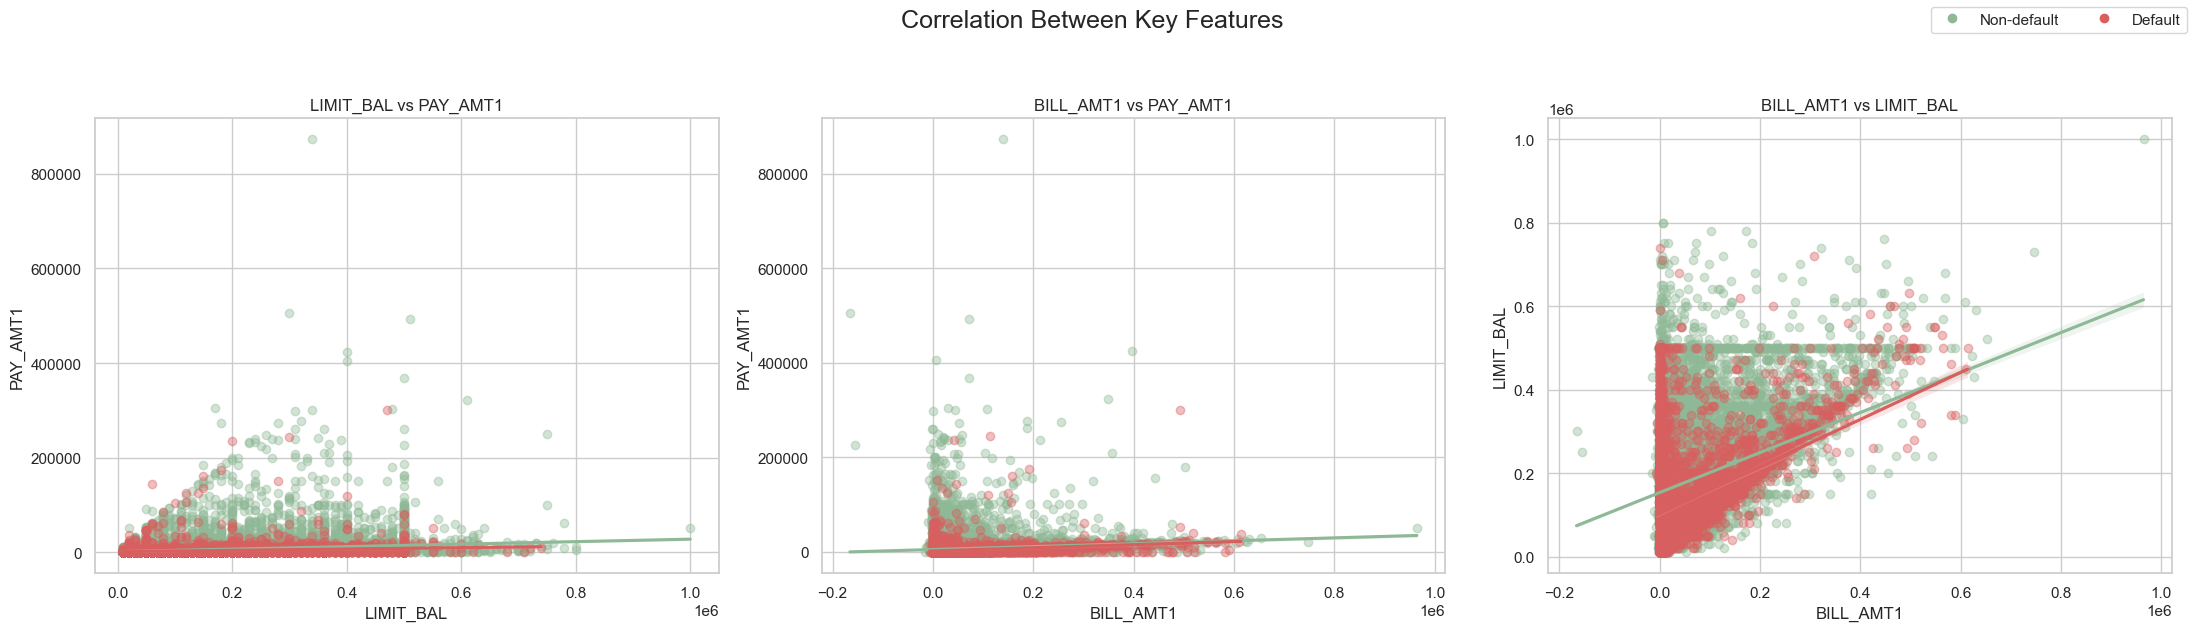

In [52]:
# Correlation between 2 values 

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

palette = {0: "#8FB996", 1: "#D95F5F"}  # green = non-default, red = default

# Chart 1 
sns.regplot(
    x="LIMIT_BAL", 
    y="PAY_AMT1", 
    data=data[data[default] == 0], 
    scatter_kws={'alpha':0.4}, 
    ax=axes[0],
    color=palette[0],
    label="Non-default"
)
sns.regplot(
    x="LIMIT_BAL", 
    y="PAY_AMT1", 
    data=data[data[default] == 1], 
    scatter_kws={'alpha':0.4}, 
    ax=axes[0],
    color=palette[1],
    label="Default"
)
axes[0].set_title("LIMIT_BAL vs PAY_AMT1")

# Chart 2
sns.regplot(
    x="BILL_AMT1", 
    y="PAY_AMT1", 
    data=data[data[default] == 0], 
    scatter_kws={'alpha':0.4}, 
    ax=axes[1],
    color=palette[0]
)
sns.regplot(
    x="BILL_AMT1", 
    y="PAY_AMT1", 
    data=data[data[default] == 1], 
    scatter_kws={'alpha':0.4}, 
    ax=axes[1],
    color=palette[1]
)
axes[1].set_title("BILL_AMT1 vs PAY_AMT1")

# Chart 3 
sns.regplot(
    x="BILL_AMT1", 
    y="LIMIT_BAL", 
    data=data[data[default] == 0], 
    scatter_kws={'alpha':0.4}, 
    ax=axes[2],
    color=palette[0]
)
sns.regplot(
    x="BILL_AMT1", 
    y="LIMIT_BAL", 
    data=data[data[default] == 1], 
    scatter_kws={'alpha':0.4}, 
    ax=axes[2],
    color=palette[1]
)
axes[2].set_title("BILL_AMT1 vs LIMIT_BAL")

# Global title
fig.suptitle("Correlation Between Key Features", fontsize=18, y=1.05)

# Shared legend
handles = [
    plt.Line2D([], [], marker="o", linestyle="", color=palette[0], label="Non-default"),
    plt.Line2D([], [], marker="o", linestyle="", color=palette[1], label="Default")
]
fig.legend(handles=handles, loc="upper right", ncol=2)

plt.tight_layout()
plt.show()


## Dafault prediction

Transform our dataset to features and target value. And split to train and tesst data set 70% to 30%

In [0]:

X = data.drop(default, axis =1)
y = data[default]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify =y, random_state =42)
stdX_train, stdX_test, y_train, y_test = train_test_split(stdX, y, test_size = 0.3, stratify =y, random_state =42)


Features selection. Use RFE algorithm


In [0]:


num_f = 4
model =  LogisticRegression()
run_model = RFE(model, num_f)
run_model.fit(stdX, y)
print("Features  ranking:", run_model.ranking_)
score_m = run_model.score(stdX, y)
print("Features selected: %f"  % score_m.mean())
features_name = np.array(features.columns)
print("Most efficient columns: %s" % features_name[run_model.support_])

Features  ranking: [19  7 14  8  6  9  1  5  3 17 10 20  1  4  1 21 12 18  2  1 13 11 15 16]
Features selected: 0.812833
Most efficient columns: ['PAY_0' 'BILL_AMT1' 'BILL_AMT3' 'PAY_AMT2']


In [0]:
Xlim  = stdX[['PAY_0','BILL_AMT1','BILL_AMT3', 'PAY_AMT2']]
Xlim_tr, Xlim_t, y_tr, y_t = train_test_split(Xlim, y, test_size = 0.3, stratify = y, random_state=42)

Use Logistic regression for classification


In [0]:

C_param = {'C': np.logspace(0.5,5,10)}
logreg = LogisticRegression()
best_C = RandomizedSearchCV(logreg, C_param, cv=5, random_state = 0)
#best_C.fit(X_train, y_train)
C = 3.17 #model works very slowly, this is final result
#print("Tuned Logistic Regression Parameters: {}".format(best_C.best_params_)) 


Potentially Log regression doen't work well for such a complicated problem. So, C paramenter doen't play role in this case, thats way model for finding the best param C doen't work(Converge)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Sore 0.7787777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


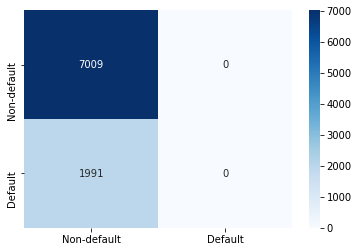

In [0]:

LogReg = LogisticRegression()
model = LogReg.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Sore {}".format(metrics.accuracy_score(y_pred, y_test)))

cros_val = cross_val_score(LogReg, X_train, y_train, cv=5)
print(metrics.classification_report(y_test, y_pred))

Confu_Matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(Confu_Matrix, annot= True, cmap = "Blues", fmt = "d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])

As expected Logistic Rergression (LR) can't solve this problem. Actually LR recognised no Default at all. 

Not assuming that features may help, but want to know how perform the model with diff features.

Sore 0.8083333333333333
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



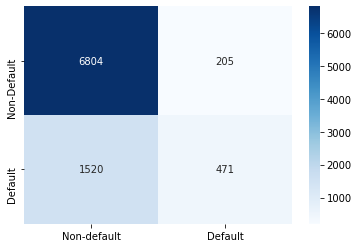

In [0]:
stXLog = LogisticRegression()
stX_model = stXLog.fit(stdX_train, y_train)
y_pred2 = stX_model.predict(stdX_test)
print("Sore {}".format(metrics.accuracy_score(y_test, y_pred2)))
cv_score2 = cross_val_score(stXLog, stdX_train, y_train)
print(metrics.classification_report(y_test, y_pred2))
Con_Matric2 = metrics.confusion_matrix(y_test, y_pred2)
sns.heatmap(Con_Matric2, cmap = "Blues", annot = True, fmt ="d", xticklabels=['Non-default', 'Default'],
            yticklabels = ['Non-Default', 'Default'])

At leat this model can recognise Default cases. 

now try to apply the "best" features


Score 0.8122222222222222
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.27      0.39      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.62      0.64      9000
weighted avg       0.80      0.81      0.78      9000



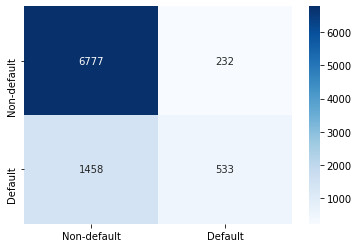

In [0]:
B_LogReg = LogisticRegression()
B_model = B_LogReg.fit(Xlim_tr, y_tr)
b_y_pred = B_model.predict(Xlim_t)

print("Score {}".format(metrics.accuracy_score(y_t, b_y_pred)))
print(metrics.classification_report(y_t, b_y_pred))

Con_matic3 = metrics.confusion_matrix(y_t, b_y_pred)
sns.heatmap(Con_matic3, cmap = "Blues", annot = True, fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])


Some of metrics became better but others became worse

Decision Tree algorithm


In [0]:


param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ['gini', 'entropy']}
RanS = DecisionTreeClassifier()
Random_param = RandomizedSearchCV(RanS, param_dist)
Random_param.fit(X_train, y_train)
print("Best param {}".format(Random_param.best_params_))


Best param {'min_samples_leaf': 5, 'max_features': 9, 'max_depth': 6, 'criterion': 'entropy'}


Use the best parameters for Decision Tree

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.65      0.32      0.43      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



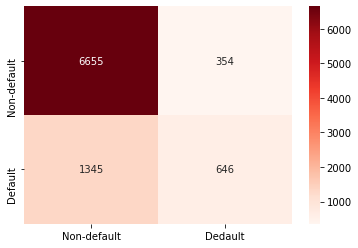

In [0]:
Dec_Tree = DecisionTreeClassifier(min_samples_leaf = 1, criterion = 'entropy',
                                  max_features = 8, max_depth = 6 )
model_DS = Dec_Tree.fit(X_train, y_train)
y_pred_DS = Dec_Tree.predict(X_test)
print(metrics.classification_report(y_test, y_pred_DS))

CM_DS = metrics.confusion_matrix(y_test, y_pred_DS)
sns.heatmap(CM_DS, cmap = "Reds", annot = True, fmt = "d",
            xticklabels = ['Non-default', 'Dedault'],
            yticklabels = ['Non-default', 'Default'])

Finaly Random forest, aaaw

In [0]:

dist_param = { "n_estimators": [10,50, 70, 100, 110, 120],
              "max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "criterion": ['gini', 'entropy']}
df = RandomForestClassifier()
m_df = RandomizedSearchCV(df, dist_param)
m_df.fit(X_train, y_train)
print("best param {}".format(m_df.best_params_))


best param {'n_estimators': 100, 'max_features': 5, 'max_depth': 8, 'criterion': 'entropy'}


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.66      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



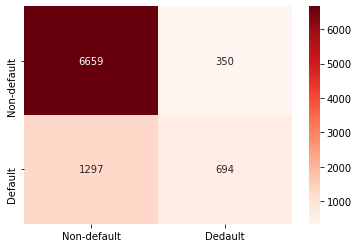

In [0]:
mod_rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, criterion='gini')
mod_rf.fit(X_train, y_train)
y_pred_rf = mod_rf.predict(X_test)

print(metrics.classification_report(y_test, y_pred_rf))
CM_RF=metrics.confusion_matrix(y_test, y_pred_rf)
sns.heatmap(CM_RF, cmap = "Reds", annot = True, fmt = "d",
            xticklabels = ['Non-default', 'Dedault'],
            yticklabels = ['Non-default', 'Default'])

Try NN for classification


In [0]:

sts = StandardScaler()
Xnn = sts.fit_transform(features)

ynn = to_categorical(y, num_classes=None, dtype='float32')
Xnn_train, Xnn_test, ynn_train, ynn_test = train_test_split(Xnn, ynn, random_state = 42, test_size = 0.3)

ohe = OneHotEncoder()
#y = ohe.fit_transform(y).toarray()



In [0]:


nn_model  = Sequential()
nn_model.add(Dense(15, input_dim = 24, activation = "relu"))
nn_model.add(Dense(10, activation = 'relu'))
nn_model.add(Dense(2, activation = 'sigmoid'))
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = nn_model.fit(Xnn_train, ynn_train, epochs=100, batch_size=64)

#a = accuracy_score(pred,test)
#print('Accuracy is:', a*100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





21000/21000 [==============================] - 1s 55us/step - loss: 0.5062 - acc: 0.7908
Epoch 2/100
21000/21000 [==============================] - 0s 21us/step - loss: 0.4577 - acc: 0.8084
Epoch 3/100
21000/21000 [==============================] - 0s 19us/step - loss: 0.4458 - acc: 0.8124
Epoch 4/100
21000/21000 [==============================] - 0s 20us/step - loss: 0.4411 - acc: 0.8156
Epoch 5/100
21000/21000 [==============================] - 0s 19us/step - loss: 0.4381 - acc: 0.8176
Epoch 6/100
21000/21000 [==============================] - 0s 20us/step - loss: 0.4359 - acc: 0.8187
Epoch 7/100
21000/21000 [==============================] - 0s 20us/step - loss: 0.4338 - acc: 0.8198
Epoch 8/100
21000/21000 [==============================] - 0s 20us/step - loss: 0.4328 - acc: 0.8204
Epoch 9/100
21000/21000 [==============================] - 0s 20us/step - loss: 0.4320 - a

We can see that even the siple NN works much better than any classifier